### Simulation

In [1]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

510

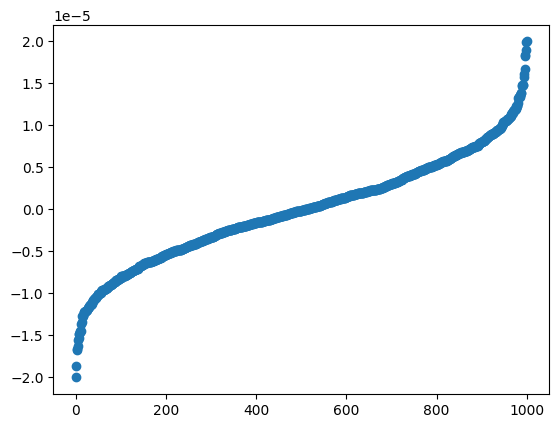

In [2]:
low = -20e-6
high = 20e-6 
n_iso = 1000
mean = (low + high) / 2
std_dev = (high - low) / 6 

z_pos = np.random.normal(loc=mean, scale=std_dev, size=n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.clip(z_pos, low, high)
z_pos = np.sort(z_pos)

plt.plot(z_pos, 'o')

np.where(z_pos == 0)[0][0]


In [3]:
# seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq'
# seq_path_gauss_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/simple_gauss.seq'
# config_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/config_1pool.yaml'

seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss_gradient.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'

adc_time = 3
retun_zmag = False
show_plot = False
write_all_mag = True
plt_range = [0, 4]
# z_pos = np.linspace(-1e-6, 1e-6, 10001)
iso_select = [-5,0,5]
# z_pos = np.array([0])

In [4]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag, 
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]

['rf at 0.0000s', 'gz at 0.0100s', 'rf at 0.0599s', 'gz at 0.0699s', 'adc at 0.1698s']


/Users/danielmiksch/JupyterLab/optim/bmc/utils/eval.py:299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


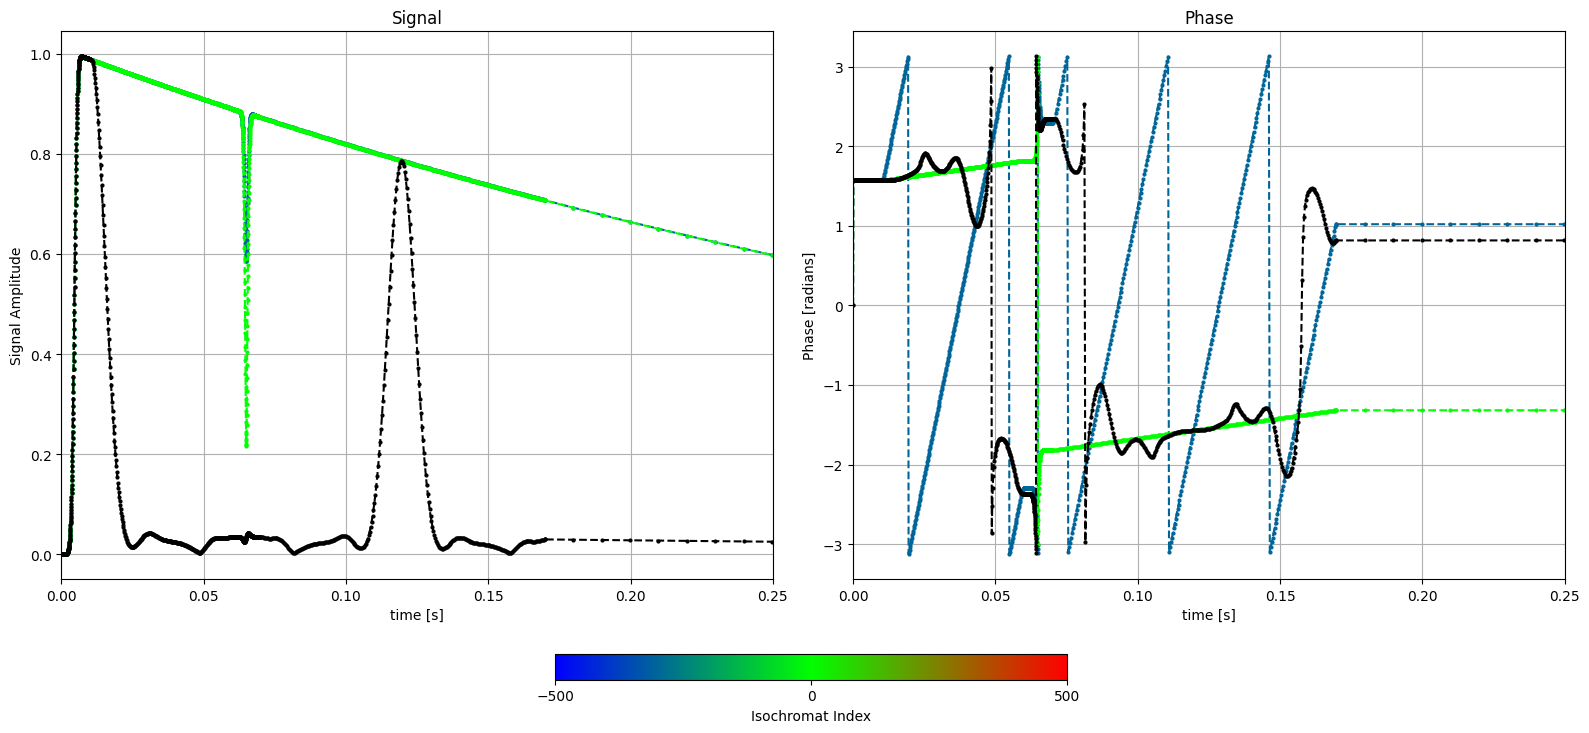

In [5]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag()

iso_select = [-300,0]
plt_range = [0, .25]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)



### Animation

In [6]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = True
kwargs = {'quality': '-qh', 'write': '--write_to_movie'}  #--write_to_movie

In [7]:
sim.animate(run_time=run_time, 
            track_path=track_path, 
            ie=ie, 
            timing=timing,
            total_mag=total_mag, 
            **kwargs)

Manim Community v0.18.1

(1492, 3)
[[-5.72239221e-11  1.03889698e-05  1.00000000e+00]
 [-6.69187907e-11  1.21933239e-05  1.00000000e+00]
 [-7.82467323e-11  1.42838012e-05  1.00000000e+00]
 ...
 [ 4.75181906e-05 -3.04272192e-05  6.45703184e-01]
 [ 4.65293425e-05 -2.97934725e-05  6.46922793e-01]
 [ 4.55610723e-05 -2.91729255e-05  6.48138204e-01]]
